# IMDB sentiment analysis with scikit-learn


As part of the coursework for the Artificial Intelligence class we chose to implement the following algorithms:

- <span style="color:green "> **Naive Bayes Classifier** </span>
- <span style="color:green ">**Random Forest**</span> using ID3 for tree generation
- <span style="color:green ">**Logistic Regression**</span> with stochastic gradient ascent adding normalization.

We use these algorithms to categorize mathematically based on the words of the "<u>Large Movie Review Dataset</u>" also known as the "IMDB dataset" the reviews into positive or negative. Then we compare the classifications of our predictions with the real categories of the reviews (<span style="color:red;"> positive </span> or<span style="color:green;"> negative </span> ) as they are already categorized in the database and find the success rate of our algorithms.

The parameters we set for the rare and not words of the training data are as follows: 
- <span style="color:blue;"> n=99 </span>(the most frequent that are omitted)
- <span style="color:blue;"> m=1000 </span>(the frequent words that make up the vocabulary used in the algorithms)
- <span style="color:blue;"> k=2898 </span> (the rarer words that do not concern us)

Additionally, we chose a default number of Random Forest trees equal to <span style="color:blue;"> 10 </span>.

In the first stage regarding the data extraction from the dataset, we use the Keras API Implementation, the high-level API of TensorFlow. After storing the vectors in correspondence with each other, each REVIEW(i) with its corresponding CLASSIFICATION(i), for the training data and the test data, we convert them into binary form where:
- **x_test_binary** and **x_train_binary**: Each contains a sequence of 1000 digits. Each digit represents one of the words in the vocabulary, having the value 1 if the respective word appears in the said review and 0 if not.
- **y_train_list** and **y_test_list**: We convert for our convenience into lists the ndarrays that include the classification of the reviews into positive/negative (1/0).




## Fetch data

In [6]:
import tensorflow as tf
import numpy as np
import math 
from tqdm import tqdm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt 
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd 
import random
from tensorflow.keras.utils import plot_model

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=4000)

word_index = tf.keras.datasets.imdb.get_word_index()
index2word = dict((i + 3, word) for (word, i) in word_index.items())
index2word[0] = '[pad]'
index2word[1] = '[bos]'
index2word[2] = '[oov]'
x_train = np.array([' '.join([index2word[idx] for idx in text]) for text in x_train])
x_test = np.array([' '.join([index2word[idx] for idx in text]) for text in x_test])

In [7]:
len(word_index)

88584

In [8]:
x_train[0]

"[bos] this film was just brilliant casting location scenery story direction [oov] really suited the part they played and you could just imagine being there robert [oov] is an amazing actor and now the same being director [oov] father came from the same [oov] island as myself so i loved the fact there was a real connection with this film the witty [oov] throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for [oov] and would recommend it to everyone to watch and the fly [oov] was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also [oov] to the two little [oov] that played the [oov] of norman and paul they were just brilliant children are often left out of the [oov] list i think because the stars that play them all grown up are such a big [oov] for the whole film but these children are amazing and should be [oov] for what they have done 

## Create the vocabulary

In [9]:
from collections import Counter

vocabulary = list()
train_words = list()
sorted_words = list()
for text in x_train:
  tokens = text.split()
  train_words.extend(tokens)

Counter = Counter(train_words)
Counter_copy = Counter
temp = Counter.most_common(3998)
for key in temp:
    sorted_words.append(key[0])

#n=99, m = 1000, k = 2898
k=list()
n=list()
m = Counter.most_common(1100)
j=0
for key in m:
  j+=1
  if(j>=101):
    vocabulary.append(key[0])
 

for i in range(1,100):
  n.append(sorted_words[i])
j=0
for key in sorted_words:
  j+=1
  if(j<=1100):
    sorted_words.remove(key)
k = sorted_words.copy()

print(len(vocabulary))

1000


## Create binary vectors 

In [10]:
from tqdm import tqdm

x_train_binary = list()
x_test_binary = list()

for text in tqdm(x_train):
  tokens = text.split()
  binary_vector = list()
  for vocab_token in vocabulary:
    if vocab_token in tokens:
      binary_vector.append(1)
    else:
      binary_vector.append(0)
  x_train_binary.append(binary_vector)

x_train_binary = np.array(x_train_binary)

for text in tqdm(x_test):
  tokens = text.split()
  binary_vector = list()
  for vocab_token in vocabulary:
    if vocab_token in tokens:
      binary_vector.append(1)
    else:
      binary_vector.append(0)
  x_test_binary.append(binary_vector)

x_test_binary = np.array(x_test_binary)
#print(x_test_binary[0])
y_train_list = y_train.tolist()
print(x_train_binary[0])

vocabulary_indexes = list()
for i in range(len(vocabulary)):
  vocabulary_indexes.append(i)

100%|██████████| 25000/25000 [01:19<00:00, 312.64it/s]


[0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 


## <span style="color:green ">  Naive Bayes Classifier </span>

To classify with Naive Bayes, the algorithm first needs to be trained using the training set <u> x_train_binary</u> and <u>y_train </u>. During training, Naive Bayes calculates the probabilities of the appearance of features/words for each category.
When it needs to classify a new sample, Naive Bayes uses Bayes' theorem to calculate the probability of the sample belonging to each category, considering its features and the probabilities calculated during training. The algorithm selects the category with the highest probability as the final category of the sample.

In our implementation, we chose not to provide any hyperparameter to Naive Bayes. Additionally, in classification with the Naive Bayes algorithm, we use logarithms to prevent numerical underflow during the calculation of probabilities.

The standard equation of Naive Bayes is as follows:

**P(Class∣Features) = P(Features∣Class) * P(Class) / P(Features)**.

The logarithmic transformation simplifies computational processes:

**log(P(Class∣Features)) = log(P(Features∣Class)) + log(P(Class)) - log(P(Features))**.

This ensures numerical stability and accuracy in problematic probability models.

### Coding Structure:
- __init__(self): Initializes the Naive Bayes classifier.
  Arguments -> self.x1_while_c_is_negative and self.x1_while_c_is_positive are lists that will store the probabilities of each word occurring given a negative or positive review respectively.
  Global variables -> self.p_c0 and self.p_c1 will store the overall probability of having a negative or positive review respectively.

- **fit(self, X, Y)**: Trains the Naive Bayes classifier using the training data X (features) and Y (labels).
  Initializes counters and lists to calculate the frequency of each word in positive and negative reviews.
  Calculates the overall probability of having a positive or negative review (self.pc0 and self.pc1).
  Computes the conditional probabilities of each word given a negative or positive review. This involves counting how often each word appears in positive and negative reviews and then normalizing these counts to probabilities.
  The probabilities are rounded for better numerical stability.

- **predict(self, X)**: Predicts the class (positive or negative) for each review in the test dataset X.
  Uses logarithms to prevent numerical underflow when dealing with very small probabilities. This is a common technique in Naive Bayes implementations.
  For each review, it calculates the log probabilities for both the negative and positive classes based on the features of the review and the probabilities computed during training. The class with the higher log probability is chosen as the predicted class.
  Returns a list of predictions where each prediction corresponds to the predicted class of a review in the test set.



## Code


In [11]:
class Naive_Bayes:

    def __init__(self):
        #lists with the probabilities of having each word given we have a negative or positive review correspondingly 
        self.x1_while_c_is_negative = list()
        self.x1_while_c_is_positive = list()
        #global variables with the probability of having a negative or positive review correspondingly
        self.p_c0 = float(0)
        self.p_c1 = float(0)

    def fit(self, X, Y):
        #Initialisations of elements:
        self.x1_while_c_is_negative = []
        self.x1_while_c_is_positive = []
        reviews = len(Y) 
        neg_reviews = 0 
        pos_reviews = 0
        sum_pos =  list() #For each position i in the array: How many times does the word i appear when we have a positive review
        sum_neg =  list() #For each position i in the array: How many times does the word i appear when we have a negative review
        p_ex_pos = list() #Each element represents for the word Xelement the probability: P( Xelement = 1 | C = 1) 
        p_ex_neg = list() #Each element represents for the word Xelement the probability: P( Xelement = 1 | C = 0) 

        #Calculation of the overall probability of having a positive or negative review:
        for i in range(reviews):
            if Y[i] == 0:
                neg_reviews += 1
            else:
                pos_reviews += 1
        self.pc0 = pos_reviews/reviews
        self.pc1 = neg_reviews/reviews

        #Calculation of probabilities for each word given that we have a negative or positive review, respectively:
        

        #Initialization of lists with counters
        for i in range(len(vocabulary)):
            #We already set it to 1 to avoid the absence of any word
            sum_pos.append(0) 
            sum_neg.append(0)

        for i in range(reviews):
            for j in range(len(vocabulary)):
                if(Y[i] == 0 and X[i][j]==1):
                    sum_neg[j] +=1
                elif(Y[i] == 1 and X[i][j]==1):
                    sum_pos[j] +=1
        

        #Lists of probabilities for each word given that we have a negative or positive review
        for i in range(0,1000):
            p_ex_pos.append(0) 
            p_ex_neg.append(0)
        #for i in range(len(p_ex_neg_train)):
        for i in range(len(vocabulary)):
            p_ex_neg[i] = (sum_neg[i]+1)/(neg_reviews+2) #P(Xi = 1 | C = 0) 
        for i in range(len(vocabulary)):
            p_ex_pos[i] = (sum_pos[i]+1)/(pos_reviews+2) #P(Xi = 1 | C = 1)

        p_ex_neg = np.round(p_ex_neg, decimals=2)
        p_ex_pos = np.round(p_ex_pos, decimals=2)

        self.x1_while_c_is_positive = p_ex_pos.copy()
        self.x1_while_c_is_negative = p_ex_neg.copy()

    def predict(self, X):

        # In Naive Bayes classification here we used logarithms to prevent numerical underflow when dealing with probabilities. 
        # The standard Naive Bayes equation is the following: 
        # P(Class∣Features) = P(Features∣Class) * P(Class) / P(Features)
        # The logarithmic transformation simplifies computations:
        # log(P(Class∣Features)) = log(P(Features∣Class)) + log(P(Class)) - log(P(Features))
        # This ensures numerical stability and precision in probabilistic models.


        predictions = list()
        epsilon = 1e-10  #small positive value to avoid errors
        for i in range(len(X)):

            # Initialize log probabilities
            log_pc0 = np.log(self.pc0)
            log_pc1 = np.log(self.pc1)

            # Calculate log probability for negative class (C=0)
            for xi in range(len(X[i])):
                if X[i][xi] == 0:
                    log_pc0 += np.log(1 - self.x1_while_c_is_negative[xi])
                else:
                    log_pc0 += np.log(self.x1_while_c_is_negative[xi] + epsilon)

            # Calculate log probability for positive class (C=1)
            for xi in range(len(X[i])):
                if X[i][xi] == 1:
                    log_pc1 += np.log(self.x1_while_c_is_positive[xi] + epsilon)
                else:
                    log_pc1 += np.log(1 - self.x1_while_c_is_positive[xi])

            if log_pc0 < log_pc1:
                predictions.append(1)
            else:
                predictions.append(0)

        return predictions


In [12]:
tool = Naive_Bayes()
y_train_list = y_train.tolist()
y_test_list = y_test.tolist()
tool.fit(x_train_binary, y_train_list)
y_pred = tool.predict(x_train_binary)
sum=0
for i in range(len(y_train_list)):
    if(y_train_list[i]==y_pred[i]):
        sum+=1
correct_percentage_test = (sum/len(y_train_list))*100
print(correct_percentage_test) 

# sum = 0
# p1 = tool.x1_while_c_is_negative.copy()
# p2 = tool.x1_while_c_is_positive.copy()
tool2 = Naive_Bayes()
# tool2.fit(x_test_binary, y_test_list)
y_pred = tool.predict(x_test_binary)
sum=0
for i in range(len(y_train_list)):
    if(y_test_list[i]==y_pred[i]):
        sum+=1
correct_percentage_test = (sum/len(y_train_list))*100
print(correct_percentage_test) 

print(sum)



82.948
82.588
20647


In [ ]:
from sklearn.metrics import classification_report
nb = Naive_Bayes()
nb.fit(x_train_binary, y_train)

# Using Naive Bayes Classifier
y = nb.predict(x_test_binary)
print(classification_report(y_test, y))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82     12500
           1       0.81      0.85      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [1 0 0 ... 1 0 0]
Split training examples :  1
Split training examples :  2
Split training examples :  3
Split training examples :  4


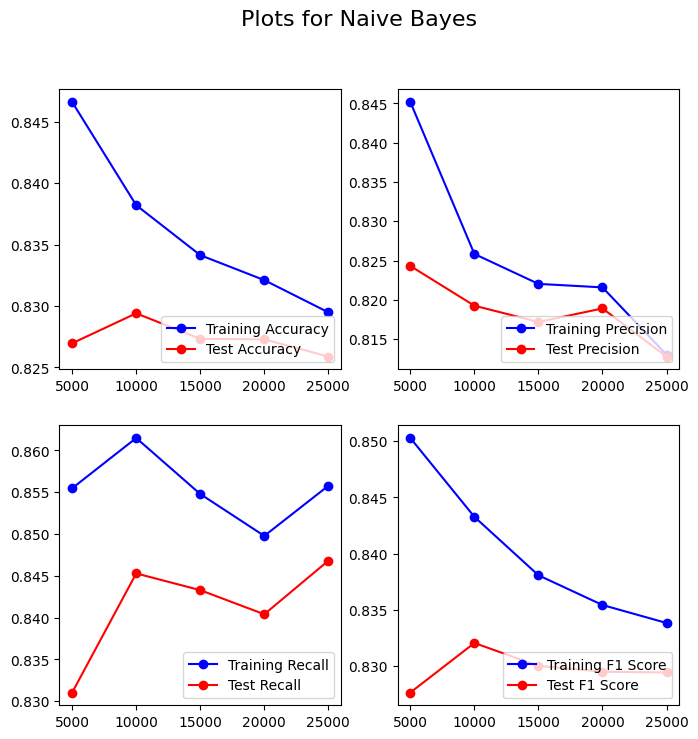

{'Training Accuracy': [0.8466, 0.8382, 0.8341333333333333, 0.8321, 0.82948],
 'Test Accuracy': [0.82696, 0.8294, 0.82732, 0.82728, 0.82588],
 'Training Precision': [0.8451688009313155,
  0.8258394991462721,
  0.8220349802119239,
  0.8215903614457831,
  0.8130272858554382],
 'Test Precision': [0.8243136010157118,
  0.8192602930914166,
  0.8171951314055353,
  0.8189117555347677,
  0.812792751286186],
 'Training Recall': [0.8554595443833464,
  0.8614684345933109,
  0.8547723350590735,
  0.8497657262486292,
  0.85576],
 'Test Recall': [0.83104, 0.84528, 0.84328, 0.8404, 0.8468],
 'Training F1 Score': [0.850283037282842,
  0.8432777993025958,
  0.8380840817389039,
  0.8354405566990101,
  0.8338465136220136],
 'Test F1 Score': [0.8276631344116008,
  0.8320667795408907,
  0.8300326784519076,
  0.8295167403663929,
  0.8294479489088273]}

In [ ]:
# Define a function to evaluate and plot the performance of a machine learning estimator.
def custom_curve(estimator, training_features, training_labels, test_features, test_labels, num_splits, plot_title):
  
  # Calculate the size of each training data split.
  size_per_split = int(len(training_features) / num_splits)
  
  # Split the training data and labels into num_splits equal parts.
  feature_splits = np.split(training_features, num_splits)
  label_splits = np.split(training_labels, num_splits)

  # Initialize lists to store various performance metrics.
  training_accuracy, test_accuracy = list(), list()
  training_precision, test_precision = list(), list()
  training_recall, test_recall = list(), list()
  training_f1_score, test_f1_score = list(), list()

  # Create a 2x2 grid of subplots for plotting the metrics.
  figure, ((accuracy_ax, precision_ax), (recall_ax, f1_score_ax)) = plt.subplots(2, 2, figsize=(8, 8), dpi=100, gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]})
  figure.suptitle("Plots for {title}".format(title=plot_title), fontsize=16)

  # Use the first split as the initial training set.
  current_features = feature_splits[0]
  current_labels = label_splits[0]
  
  # Print the current training data for debugging.
  print(current_features, current_labels)
  
  # Fit the estimator using the current training set.
  estimator.fit(current_features, current_labels)

  # Make predictions on the current training set and the entire test set.
  training_predictions = estimator.predict(current_features)
  test_predictions = estimator.predict(test_features)

  # Calculate and append accuracy for the training and test sets.
  training_accuracy.append(accuracy_score(current_labels, training_predictions))
  test_accuracy.append(accuracy_score(test_labels, test_predictions))

  # Calculate and append precision for the training and test sets.
  training_precision.append(precision_score(current_labels, training_predictions))
  test_precision.append(precision_score(test_labels, test_predictions))

  # Calculate and append recall for the training and test sets.
  training_recall.append(recall_score(current_labels, training_predictions))
  test_recall.append(recall_score(test_labels, test_predictions))

  # Calculate and append F1 score for the training and test sets.
  training_f1_score.append(f1_score(current_labels, training_predictions))
  test_f1_score.append(f1_score(test_labels, test_predictions))

  # Iteratively train the model with more data and track performance.
  for i in range(1, len(feature_splits)):
    # Print the current number of training examples being used.
    print("Split training examples : ", i)
    
    # Incrementally add more data to the training set.
    current_features = np.concatenate((current_features, feature_splits[i]), axis=0)
    current_labels = np.concatenate((current_labels, label_splits[i]), axis=0)
    
    # Re-fit the estimator with the expanded training set.
    estimator.fit(current_features, current_labels)

    # Make new predictions with the updated model.
    training_predictions = estimator.predict(current_features)
    test_predictions = estimator.predict(test_features)

    # Update the performance metrics with the new predictions.
    training_accuracy.append(accuracy_score(current_labels, training_predictions))
    test_accuracy.append(accuracy_score(test_labels, test_predictions))
    training_precision.append(precision_score(current_labels, training_predictions))
    test_precision.append(precision_score(test_labels, test_predictions))
    training_recall.append(recall_score(current_labels, training_predictions))
    test_recall.append(recall_score(test_labels, test_predictions))
    training_f1_score.append(f1_score(current_labels, training_predictions))
    test_f1_score.append(f1_score(test_labels, test_predictions))
    
  # Prepare the x-axis for the plots (training size).
  training_sizes = list(range(size_per_split, len(training_features) + size_per_split, size_per_split))

  # Plot training and test accuracy.
  accuracy_ax.plot(training_sizes, training_accuracy, 'o-', color="b", label='Training Accuracy')
  accuracy_ax.plot(training_sizes, test_accuracy, 'o-', color="red", label='Test Accuracy')
  accuracy_ax.legend(loc="lower right")
  
  # Plot training and test precision.
  precision_ax.plot(training_sizes, training_precision, 'o-', color="b", label='Training Precision')
  precision_ax.plot(training_sizes, test_precision, 'o-', color="red", label='Test Precision')
  precision_ax.legend(loc="lower right")

  # Plot training and test recall.
  recall_ax.plot(training_sizes, training_recall, 'o-', color="b", label='Training Recall')
  recall_ax.plot(training_sizes, test_recall, 'o-', color="red", label='Test Recall')
  recall_ax.legend(loc="lower right")

  # Plot training and test F1 scores.
  f1_score_ax.plot(training_sizes, training_f1_score, 'o-', color="b", label='Training F1 Score')
  f1_score_ax.plot(training_sizes, test_f1_score, 'o-', color="red", label='Test F1 Score')
  f1_score_ax.legend(loc="lower right")
    
  # Display the plots.
  plt.show()

  # Compile and return the performance data.
  performance_data = {
    'Training Accuracy': training_accuracy,
    'Test Accuracy': test_accuracy,
    'Training Precision': training_precision,
    'Test Precision': test_precision,
    'Training Recall': training_recall,
    'Test Recall': test_recall,
    'Training F1 Score': training_f1_score,
    'Test F1 Score': test_f1_score
  }

  return performance_data

tool = Naive_Bayes()
tool.fit(x_train_binary, y_train_list)
custom_curve(tool, x_train_binary, y_train, x_test_binary, y_test, 5, "Naive Bayes")


## <span style="color:green ">   RANDOM FOREST - ID3 </span>

Random Forest is an effective machine learning model based on the ID3 algorithm for creating decision trees. Random Forest operates by taking random samples from the dataset and training multiple ID3 trees. Each tree categorizes the data based on a different subset of words from our database. Eventually, the model aggregates the predictions from all the trees and selects the most frequent category as the final prediction. The strength of Random Forest arises from the ensemble of different trees, achieving balanced and reliable predictions, regardless of the nature of the data (positive or negative) used for training.

Regarding the hyperparameters we used, we give the Random Forest initialization a number n of words that will form the subset of the vocabulary to be processed and a number of trees.

We noticed that since the selection of n words happens randomly, the algorithms always give a different percentage of successful predictions. The results varied from 65% to almost 75%. Although the results in every execution, we noticed that we achieve the best results with the combinations:

- <span style="color:red "> 300 words</span> and <span style="color:red "> 8 trees </span> which reached 73.551% (training) and 73.472% (testing)
- <span style="color:red "> 400 words </span> and <span style="color:red "> 8 trees </span> which reached 73.024% (training) and 73.012% (testing)
- <span style="color:red "> 400 words </span> and<span style="color:red ">  9 trees </span>  which reached 74.156% (training) and 74.084% (testing)

We concluded that <u> 400 words and 9 trees </u> is the better case, and so we used these parameters for the result curves and arrays.





### Coding Structure for ID3:
- **IG(Y, Xi)**: Calculate the Information Gain of a feature Xi in the dataset.
  - Calculates the entropy (H(C)) of the class labels (C) in the dataset. Entropy is a measure of the uncertainty or impurity in the class distribution.
  - For each value (0 or 1) that the feature Xi can take, it calculates the conditional entropy of the class given that feature value (H(C|Xi)).
  - Information Gain is then computed as the difference between the original entropy and the weighted sum of these conditional entropies. It measures the reduction in entropy or surprise from revealing the feature.
- **class Tree()**: Represent a node in the decision tree.
  - <span style="color:blue "> word </span>: The word used for splitting at this node.
  - <span style="color:blue ">tag </span> : Indicates if the node corresponds to a positive or negative classification based on the splitting word.
  - <span style="color:blue ">children </span> : A list of child nodes stemming from this node.
  - <span style="color:blue ">classification </span> : The final classification decision at this node, only assigned at leaf nodes.
- **__init__(self, max_depth = 10)**: Initialize the ID3 algorithm with a maximum depth for the tree.
- **most_IG(self, X, Y, vocabulary)**: Determine which word from the vocabulary has the highest Information Gain and should be used to split the data at the current node.
- **fit(self, X, Y, vocabulary, default)**: Recursively build the tree from the training data. At each node, it uses the word with the highest Information Gain to split the data, creates child nodes, and continues the process until the maximum depth is reached, all words are used, or the data is perfectly classified.
- **singular_prediction(self, X, tree)**: Make a prediction for a single instance by traversing the tree based on the features of the instance and returning the classification at the leaf node.
- **predict(self, tree, X)**: Make predictions for a set of instances by applying singular_prediction to each.

 ## <span style="color:green  ">  ID3 Classifier </span>

In [13]:
#The formula for calculating the entropy is:
#H(C) = -P(C=0)*log2(P(C=0)) -P(C=1)*log2(P(C=1))
#And it is used in the calculation of the Information Gain as follows:
#IG(Y,Xi)= H(C) - P(Xi = 1)*H(C|Xi=1) + P(Xi = 0)*H(C|Xi=0)
#Which, if we want to alanlyze more, becomes:
#IG(Y,Xi)= H(C) - 
#         (P(X=1)*( -(P(C=1|X=1)*log2(P(C=1|X=1))) - (P(C=0|X=1)*log2(P(C=0|X=1))) +
#		   P(X=0)*( -(P(C=1|X=0)*log2(P(C=1|X=0))) - (P(C=0|X=0)*log2(P(C=0|X=0))))

def IG(Y, Xi):

    #Part A: Calculating the H(C) = -P(C=0)*log2(P(C=0)) -P(C=1)*log2(P(C=1))
    Hc = 0
    for c in range(2):
        pc = list(Y).count(c)/len(Y) #P(C=Ci) = (Number of Ci)/(All C instances)
        Hc += - pc * math.log(pc, 2)

    #Part B: Calculating the IG(Y,Xi)= H(C) - P(Xi = 1)*H(C|Xi=1) + P(Xi = 0)*H(C|Xi=0)
    #this will happen in two repetitions: one for Xi=0 and one for Xi=1
    Hc_second = 0
    for feature in range(2):
        p = list(Xi).count(feature)/len(Xi) #P(X = i) = (Number of Xi=feat)/(All features of Xi)
        
        #finding the number of Y instances for which X=Xi, which will be used for calculating the P(C=c|X=x)
        Ys = list()  
        for i in range(len(Xi)):
            if Xi[i] == feature:
                Ys.append(Y[i])

        #Calculating the H(C=c|X=x) = ( -(P(C=1|X=x)*log2(P(C=1|X=x))) - (P(C=0|X=x)*log2(P(C=0|X=x))) (for x in [0,1])
        for c in range(2):
            if len(Ys)!=0:
                pc_while_x = Ys.count(c)/len(Ys) #P(C=c|X=x) = (Instances of C for which C=c and X=x)/(All instances of C for which X=x)
                if pc_while_x != 0:
                    H = - p * pc_while_x * math.log(pc_while_x, 2)
                    Hc_second += H
    ig = Hc - Hc_second
    return ig    


class Tree():
    def __init__(self):
        self.word = "no word yet" #The word used for the classification of a subtree
        self.tag = None #1 if the node has reviews with the word used for classification, 0 if they do not have it.
        self.children = list() #Children of a node
        self.classification = int #The final classification. Takes a value only if the classification has been executed.
    
    def new_child(self, node):
        self.children.append(node)

class ID3():
    def __init__(self, max_depth = 10):
        self.max_depth = max_depth
        self.depth = 0

    def most_IG(self, X, Y, vocabulary):

        max_gain = -1
        max_word= -1


        for w in vocabulary:
            x_word = list() #List of all the values that a word will take in variable X
            for ex in range(len(X)):
                x_word.append(X[ex][w])
            word_ig = IG(Y, x_word) #We send Y and the list to IG to find the information gain of the word relative to Y.

            if(word_ig>max_gain):
                max_gain = word_ig
                max_word = w

        return max_word #The word with the maximum Information Gain

    def fit(self, X, Y, vocabulary, default):
       
        if(len(Y) == 0):
            #If we have reached this point, the Y values are finished because the classification of each review in the tree is complete.
            #The value of the classification becomes the one that prevailed at the above level of the tree.
            node = Tree()
            node.classification = default 
            return node 

        if(len(set(Y)) == 1):
            # The set method returns a set with all the different values contained in its argument, here Y.
            # So, if we have reached this point and Y has only one value, which will be used in the classification, the process stops. 
            node = Tree()
            node.classification = Y[0]
            return node

        if(len(vocabulary) == 0):
            # If we have reached this point, we have used all the words, so no further classifications are made.
            # The process stops, and it is classified with the value that prevails in Y.
            node = Tree()
            if(Y.count(0)>Y.count(1)):
                max_count = 0
            else:
                max_count = 1
            node.classification = max_count
            return node

        if (self.depth == self.max_depth):
            # If we are here, we have reached the max depth of the tree.
            # The process stops, and it is classified with the value that prevails in Y.
            # If there is a tie between negative and positive reviews, we take the default, which is the one that prevailed at the above level.
            node = Tree()
            if((Y.count(0))>Y.count(1)):
                node.classification = 0
            elif((Y.count(0))<Y.count(1)):
                node.classification = 1
            else:
                node.classification =default
            return node

        #The process stops if either 0 or 1 prevails in the remaining reviews.
        if (float(Y.count(1))/float(len(Y))>= 0.75):
            node = Tree()
            node.classification = 1                   
            return node
        
        if(float(Y.count(0))/float(len(Y))>= 0.75):
            node = Tree()
            node.classification = 0
            return node

        #Save the prevailing classification so far to be passed as the default in the subsequent levels.
        if(Y.count(1)>Y.count(0)):
            max_count = 1
        else:
            max_count = 0


        best_word = self.most_IG(X, Y, vocabulary) #Finding the word with the highest Information Gain 
        tree = Tree() #Initialization of the tree

        #The new vocabulary, excluding the word that will be used for the split into leaves, so that it is not reused afterward.
        new_vocabulary = vocabulary.copy() 
        new_vocabulary.remove(best_word)
        self.depth += 1 #updating the depth

        for zero_or_one in range(2):
            #The new lists of reviews, because of the for two lists are created for each category (Y and X), one with the best_word and one without
            x_new = list()
            y_new = list()
            for i in range(len(X)):
                if X[i][best_word] == zero_or_one:
                    x_new.append(X[i])
                    y_new.append(Y[i])
            subtree = self.fit(x_new, y_new, new_vocabulary, max_count)
            subtree.tag = zero_or_one 
            subtree.word = best_word
            tree.new_child(subtree)            
                
        return tree

    def singular_prediction(self, X, tree):
        sub_tree = tree #Initialization of subtree
        flag = False
        while not flag:
            word_feature = sub_tree.children[0].word #We take the word with which the division happens
            for sub in sub_tree.children:
                if (sub.tag == X[word_feature]): 
                    #If the word-criterion, with which the division happened on this level, exists
                    # we move to the subtree in which the tag is 1 (which means it has reviews that include that word), 
                    # or else we move to the subtree in which the tag is 0
                    sub_tree = sub
            if(sub_tree.classification == 1 or sub_tree.classification == 0):
                # We stop when we reach a leaf. Leaves have the value 0 or 1 and that value ends up to become the sample's classification
                # All others intermediate nodes have None as the classification value.
                flag = True
        return sub_tree.classification

    def predict(self, tree, X):
        y_pred = list()
        for i in range(len(X)):
            y_pred.append(self.singular_prediction(X[i], tree)) #prediction for each review separately
        
        return y_pred

In [14]:
model = ID3(400)
y_train_list = y_train.tolist()
y_test_list = y_test.tolist()
trained_tree = model.fit(x_train_binary, y_train_list, vocabulary_indexes, 0)

y_pred = model.predict(trained_tree, x_train_binary)
sum=0
for i in range(len(y_test)):
    if(y_train_list[i]==y_pred[i]):
        sum+=1
correct_percentage_test = (sum/len(y_test_list))*100
print(correct_percentage_test)

#trained_tree = model.fit(x_test_binary, y_test_list, vocabulary_indexes, 0)
y_pred = model.predict(trained_tree, x_test_binary)
y_test_list = y_test.tolist()
sum=0
for i in range(len(y_test)):
    if(y_test_list[i]==y_pred[i]):
        sum+=1
correct_percentage_test = (sum/len(y_test_list))*100
print(correct_percentage_test)

81.708
74.79599999999999


  ## <span style="color:green "> Random Forest classifier </span>
  
  ### Coding Structure for Random Forest:
- **_init_(self, num_of_words, trees = 10)**: Initialize the Random Forest classifier.
  - <span style="color:blue"> self.num_of_word  </span>: The number of words to consider from the vocabulary for creating the trees.
  - <span style="color:blue">self.trees  </span> : The number of decision trees to create in the forest.
  - <span style="color:blue">self.forest </span>: A list that will hold all the decision trees.
- **new_sample(self, X, Y)**: Generate a new sample from the dataset. Randomly selects instances from the dataset to create a subsample.
- **new_vocabulary(self, X)**: Create a new subset of vocabulary words. Randomly selects a set of words from the full vocabulary. Each decision tree in the forest will use this subset of words to make decisions which helps to ensure that the trees in the forest are diverse.
- **fit(self, X, Y, max_depth = 10)**: Build the forest by creating individual decision trees.
  - For each tree, it creates a new sample and a new subset of words.
  - It then initializes an ID3 decision tree and fits it to the data.
  - The completed tree is added to the forest.
- **predict(self, X)**: Predict the class for each instance in the dataset.
  - For each instance, each tree in the forest makes a prediction.
  - The predictions are tallied, and the class with the majority vote is chosen as the final prediction for that instance.
  - Returns a list of predictions, one for each instance.

In [15]:
import random

class Random_Forest():
    def __init__(self, num_of_words, trees = 10):
        self.num_of_words = num_of_words #Αριθμός των λέξεων Number of words
        self.trees = trees #Numbers of trees to be created
        self.forest = list() #List of trees

    def new_sample(self, X, Y):
        # Initialization of the new x and y
        x_new = list()
        y_new = list()

        y_indexes = list() #Indexes of reviews that haven't be selected yet
        for i in range(len(Y)):
            y_indexes.append(i)

        for i in range(len(X)):
            #Random selection of reviews for the subset that the method will return, using the indexes that have been created above
            random_choice = random.choice(y_indexes) 
            x_new.append(X[random_choice])
            y_new.append(Y[random_choice])

        return x_new, y_new

    def new_vocabulary(self, X):
        # List with the indexes of the vocabulary for the random selection of new words for the new vocabulary that this method will return
        words_indexes = list()
        for x in range(len(X[0])):
            words_indexes.append(x)

        new_words = list()
        for i in range(self.num_of_words):
            random_word = random.choice(words_indexes) #Random selection of word
            words_indexes.remove(random_word) #Subtrackting the word from the old vocabulary 
            new_words.append(random_word) #Insertimg the word in the new vocabulary

        return new_words

    def fit(self, X, Y, max_depth = 10):
        for i in range(self.trees):
            id3 = ID3(max_depth) #Creating the ID3 tree
            random_x, random_y = self.new_sample(X, Y)
            tree = id3.fit(random_x, random_y, self.new_vocabulary(random_x), 0)
            self.forest.append(tree)

    def predict(self, X):
        y_pred = list()
        for i in range(len(X)):
            zeros =0
            ones = 0
            for j in range(self.trees):
                id3 = ID3()
                prediction = id3.singular_prediction(X[i], self.forest[j])
                if (prediction == 1):
                    ones += 1
                elif(prediction==0):
                    zeros +=1
            if ones>zeros:
                y_pred.append(1)
            else:
                y_pred.append(0)
        return y_pred

In [16]:

model = Random_Forest(400,8) #the combination that gives the best results
trained_forest = model.fit(x_train_binary, y_train_list)
y_pred = model.predict(x_train_binary)
y_train_list = y_train.tolist()
sum=0
for i in range(len(y_train)):
    if(y_train_list[i]==y_pred[i]):
        sum+=1
correct_percentage_test = (sum/len(y_train_list))*100
print(correct_percentage_test)

y_pred = model.predict(x_test_binary)
y_test_list = y_test.tolist()
sum=0
for i in range(len(y_test)):
    if(y_test_list[i]==y_pred[i]):
        sum+=1
correct_percentage_test = (sum/len(y_test_list))*100
print(correct_percentage_test)

72.14399999999999
72.124


[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [1 0 0 ... 1 0 0]
Split training examples :  1
Split training examples :  2
Split training examples :  3
Split training examples :  4


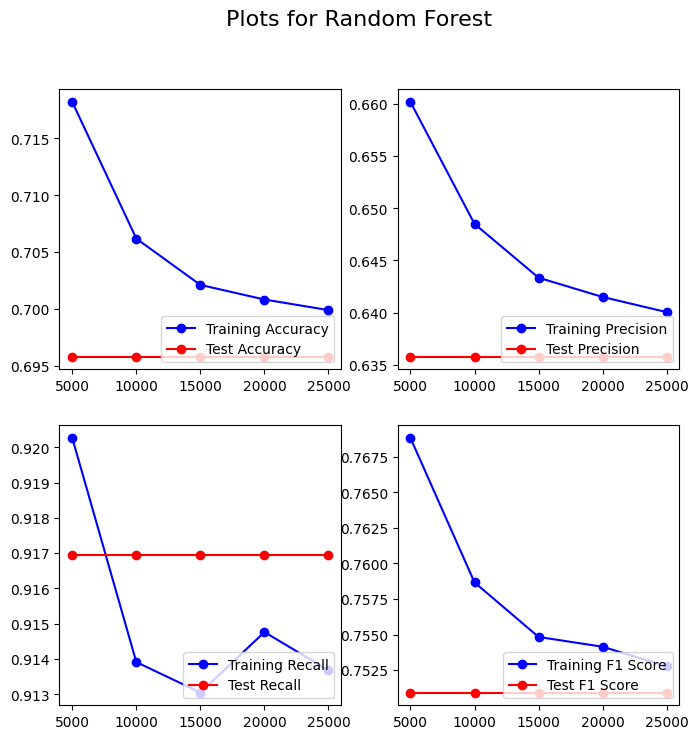

{'Training Accuracy': [0.7182, 0.7062, 0.7021333333333334, 0.70085, 0.69992],
 'Test Accuracy': [0.69584, 0.69584, 0.69584, 0.69584, 0.69584],
 'Training Precision': [0.6601859678782755,
  0.6485044235360202,
  0.6433448695164157,
  0.6414988814317674,
  0.6400470746469401],
 'Test Precision': [0.635788773019747,
  0.635788773019747,
  0.635788773019747,
  0.635788773019747,
  0.635788773019747],
 'Training Recall': [0.920267085624509,
  0.9139125272115575,
  0.9130492499668127,
  0.9147642308842588,
  0.91368],
 'Test Recall': [0.91696, 0.91696, 0.91696, 0.91696, 0.91696],
 'Training F1 Score': [0.7688269073010665,
  0.7586660095285034,
  0.7548287971905181,
  0.7541401273885351,
  0.7527682573161086],
 'Test F1 Score': [0.7509171907756812,
  0.7509171907756812,
  0.7509171907756812,
  0.7509171907756812,
  0.7509171907756812]}

In [80]:
tool = Random_Forest(400,8)
custom_curve(tool, x_train_binary, y_train, x_test_binary, y_test, 5, "Random Forest")

In [85]:
tool = Random_Forest(400,8)
trained_forest = tool.fit(x_train_binary, y_train_list)
# Using Naive Bayes Classifier
y = tool.predict(x_train_binary)
print(classification_report(y_train, y))

y = tool.predict(x_test_binary)
print(classification_report(y_test, y))

              precision    recall  f1-score   support

           0       0.82      0.53      0.65     12500
           1       0.65      0.88      0.75     12500

    accuracy                           0.71     25000
   macro avg       0.74      0.71      0.70     25000
weighted avg       0.74      0.71      0.70     25000

              precision    recall  f1-score   support

           0       0.82      0.53      0.64     12500
           1       0.65      0.89      0.75     12500

    accuracy                           0.71     25000
   macro avg       0.74      0.71      0.70     25000
weighted avg       0.74      0.71      0.70     25000

